In [ ]:
from sklearn.datasets import load_diabetes

In [ ]:
from pickle import load
dataset = load_diabetes()

In [ ]:
print(dataset['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [ ]:
import pandas as pd
df_diabetes=pd.DataFrame(dataset.data,columns=['age','sex','bmi','bp','s1','s2','s3','s4','s5','s6'])
df_diabetes['target']=dataset.target
df_diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [ ]:
## Independent and dependent features
X=df_diabetes
y=dataset['target']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

In [ ]:
X_train.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
249,-0.012780,-0.044642,0.060618,0.052858,0.047965,0.029375,-0.017629,0.034309,0.070207,0.007207,215.0
389,-0.005515,0.050680,0.001339,-0.084856,-0.011201,-0.016658,0.048640,-0.039493,-0.041176,-0.088062,51.0
121,0.063504,-0.044642,0.017506,0.021872,0.008063,0.021546,-0.036038,0.034309,0.019907,0.011349,173.0
195,0.027178,0.050680,0.025051,0.014987,0.025950,0.048477,-0.039719,0.034309,0.007838,0.023775,122.0
69,0.016281,-0.044642,-0.046085,-0.005670,-0.075870,-0.061438,-0.013948,-0.039493,-0.051404,0.019633,178.0


In [ ]:
## correlation
X_train.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.197408,0.198359,0.394903,0.238375,0.192920,-0.128403,0.227110,0.314151,0.351570,0.238289
sex,0.197408,1.000000,0.108261,0.221914,0.057674,0.180315,-0.379464,0.324882,0.150956,0.193322,0.056425
bmi,0.198359,0.108261,1.000000,0.356324,0.226047,0.248146,-0.395021,0.412826,0.435505,0.358273,0.584203
bp,0.394903,0.221914,0.356324,1.000000,0.238295,0.165632,-0.192505,0.249141,0.420236,0.368882,0.421824
s1,0.238375,0.057674,0.226047,0.238295,1.000000,0.872781,0.006313,0.559626,0.566312,0.356280,0.200281
s2,0.192920,0.180315,0.248146,0.165632,0.872781,1.000000,-0.265114,0.684840,0.325759,0.315890,0.155279
s3,-0.128403,-0.379464,-0.395021,-0.192505,0.006313,-0.265114,1.000000,-0.754616,-0.370523,-0.297055,-0.414338
s4,0.227110,0.324882,0.412826,0.249141,0.559626,0.684840,-0.754616,1.000000,0.609983,0.436311,0.451723
s5,0.314151,0.150956,0.435505,0.420236,0.566312,0.325759,-0.370523,0.609983,1.000000,0.490970,0.561139
s6,0.351570,0.193322,0.358273,0.368882,0.356280,0.315890,-0.297055,0.436311,0.490970,1.000000,0.400651


<Axes: >

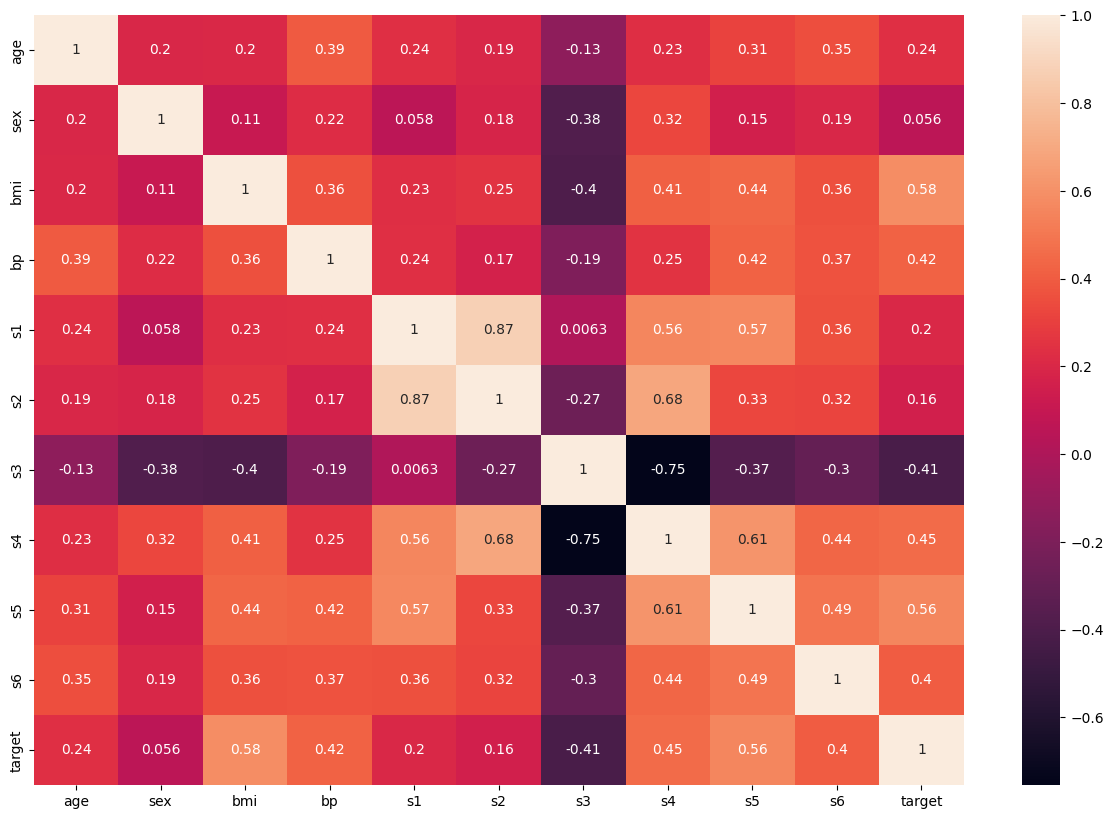

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
sns.heatmap(X_train.corr(),annot=True)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor()
regressor.fit(X_train,y_train)

DecisionTreeRegressor()

# HyperParameter Tuning

In [ ]:
param={
    'criterion':['squared_error','absolute_error','poisson'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5,10,15,20,25],
    'max_features':['auto','sqrt','log2']
}

In [ ]:
param

{'criterion': ['squared_error', 'absolute_error', 'poisson'],
 'splitter': ['best', 'random'],
 'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 25],
 'max_features': ['auto', 'sqrt', 'log2']}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
regressor=DecisionTreeRegressor()

In [ ]:
grid = GridSearchCV(regressor,param,cv=5,scoring='neg_mean_squared_error')

In [ ]:
import warnings
warnings.filterwarnings('ignore')
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 25],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [ ]:
grid.best_params_

{'criterion': 'squared_error',
 'max_depth': 20,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [ ]:
y_pred=grid.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [ ]:
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.8792889931538925
17.593984962406015
763.8195488721805


In [ ]:
selectmodel=DecisionTreeRegressor(criterion='friedman_mse',max_depth=4,max_features='log2',splitter='random')

In [ ]:
selectmodel.fit(X_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=4,
                      max_features='log2', splitter='random')

[Text(0.5, 0.9, 'x[3] <= -0.013\nfriedman_mse = 5757.456\nsamples = 309\nvalue = 152.738'),
 Text(0.25, 0.7, 'x[10] <= 140.311\nfriedman_mse = 4262.582\nsamples = 130\nvalue = 123.046'),
 Text(0.375, 0.8, 'True  '),
 Text(0.125, 0.5, 'x[6] <= 0.038\nfriedman_mse = 717.725\nsamples = 91\nvalue = 87.011'),
 Text(0.0625, 0.3, 'x[4] <= 0.03\nfriedman_mse = 758.623\nsamples = 57\nvalue = 92.614'),
 Text(0.03125, 0.1, 'friedman_mse = 778.252\nsamples = 47\nvalue = 89.702'),
 Text(0.09375, 0.1, 'friedman_mse = 439.21\nsamples = 10\nvalue = 106.3'),
 Text(0.1875, 0.3, 'x[10] <= 80.28\nfriedman_mse = 508.295\nsamples = 34\nvalue = 77.618'),
 Text(0.15625, 0.1, 'friedman_mse = 131.827\nsamples = 17\nvalue = 58.235'),
 Text(0.21875, 0.1, 'friedman_mse = 133.412\nsamples = 17\nvalue = 97.0'),
 Text(0.375, 0.5, 'x[9] <= 0.073\nfriedman_mse = 2434.214\nsamples = 39\nvalue = 207.128'),
 Text(0.3125, 0.3, 'x[10] <= 186.114\nfriedman_mse = 2138.327\nsamples = 37\nvalue = 202.676'),
 Text(0.28125, 0.1, 

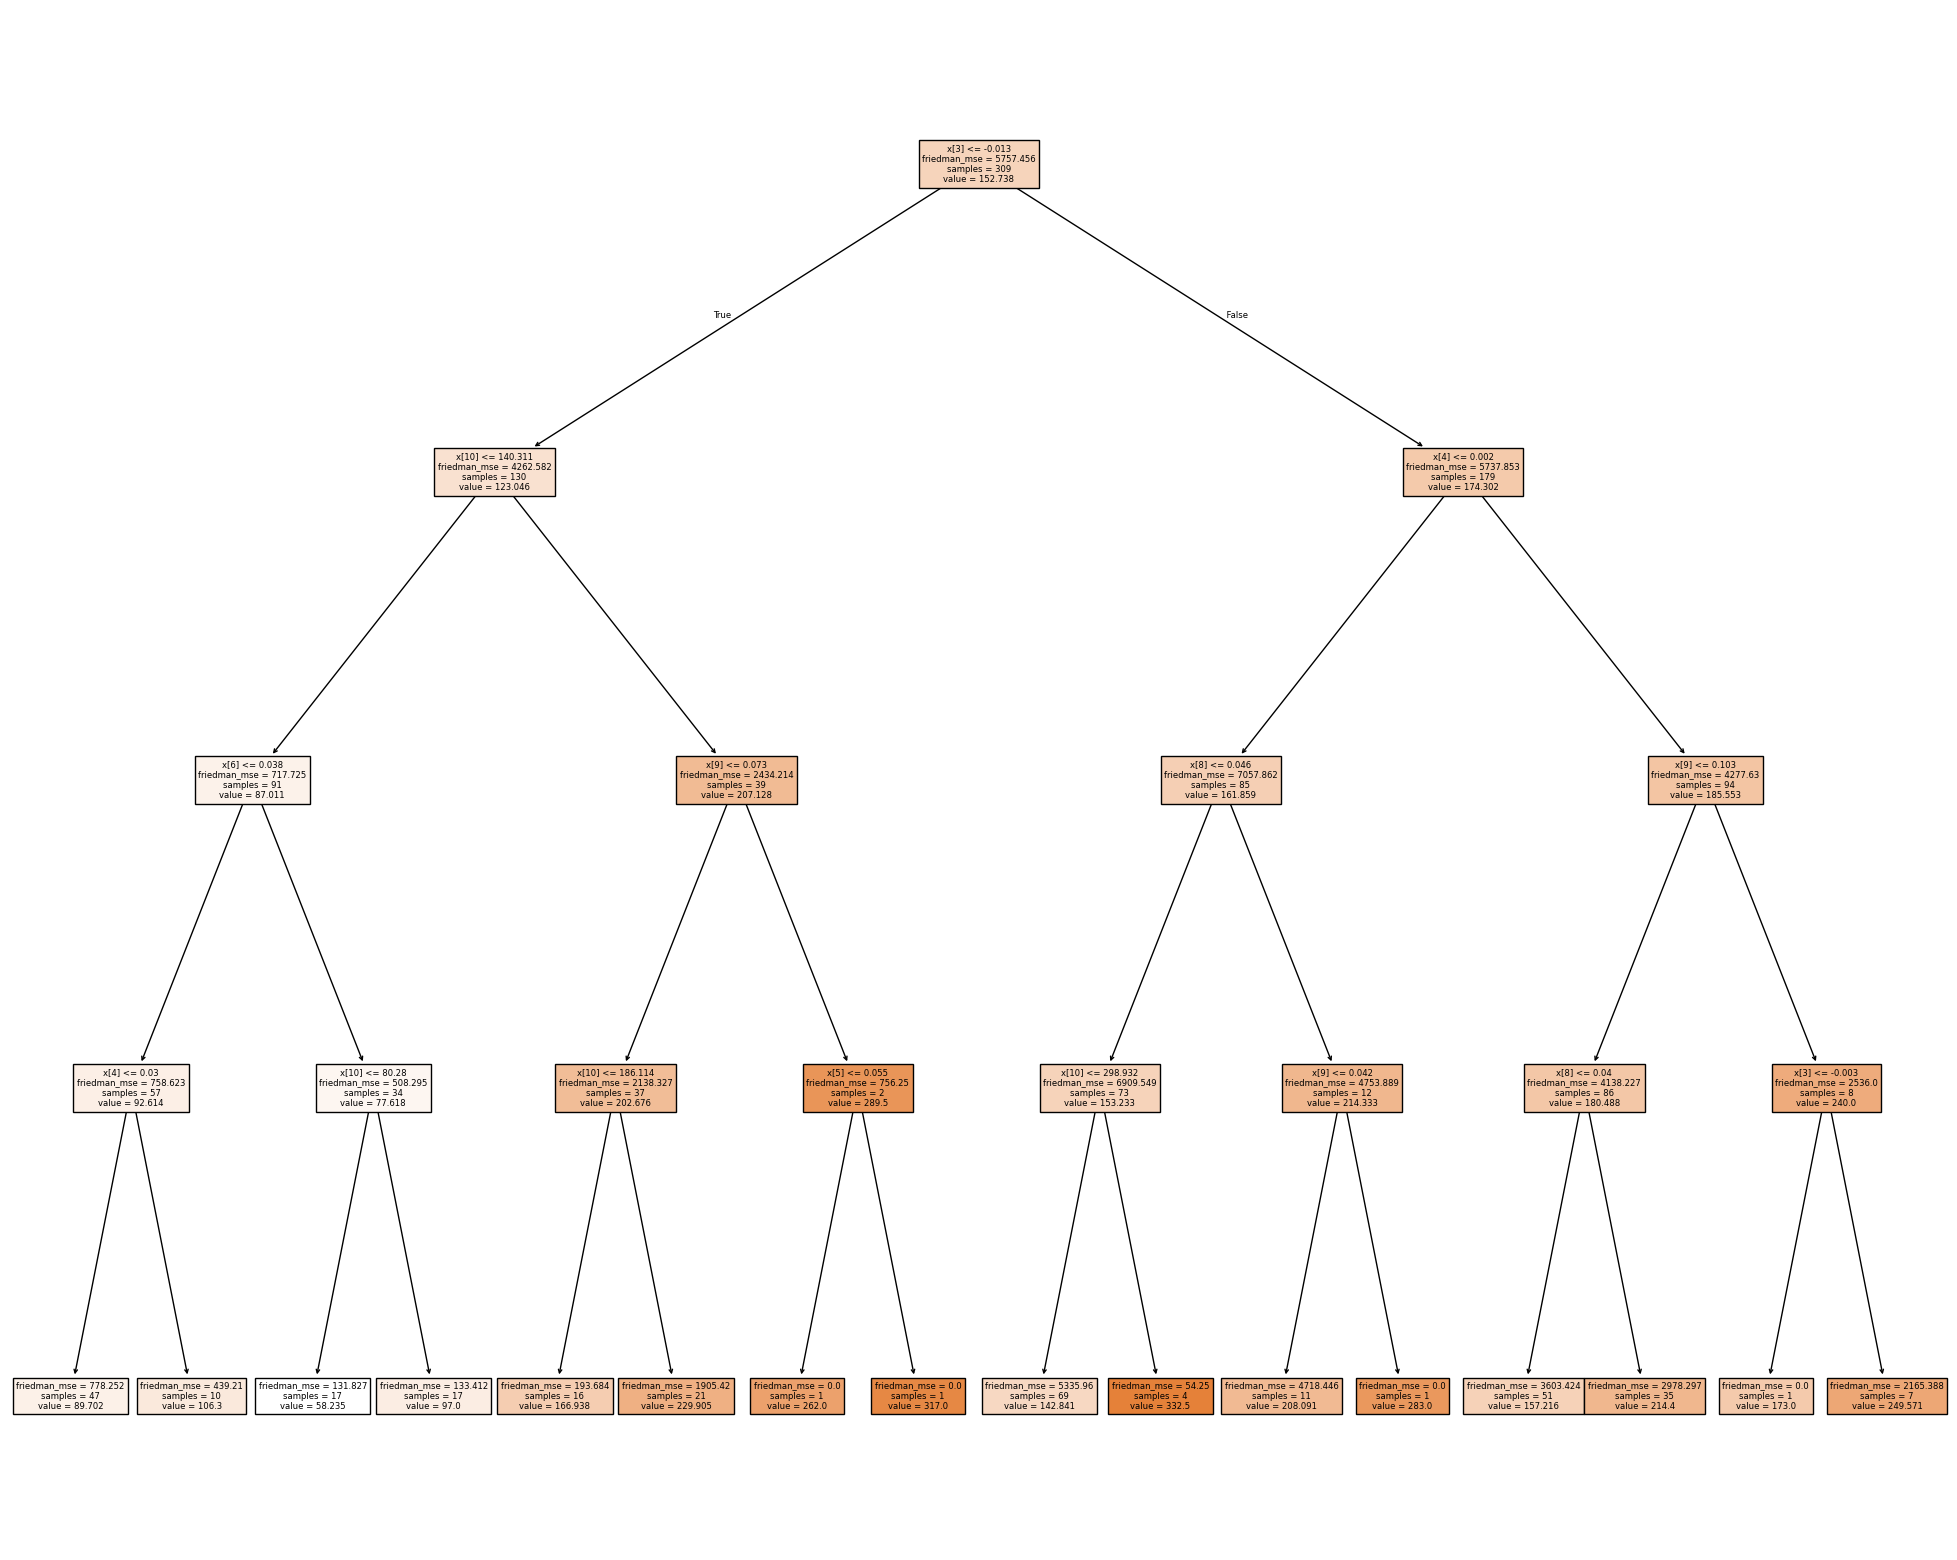

In [ ]:
## Visualize the Decision Tree
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(25,20))
tree.plot_tree(selectmodel,filled=True)